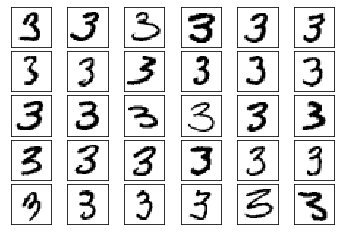

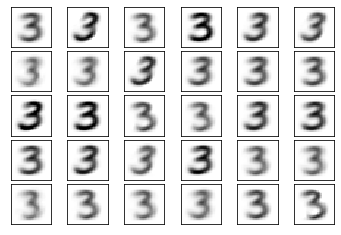

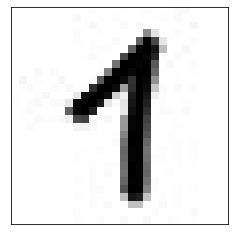

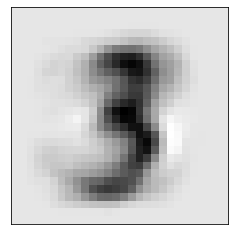

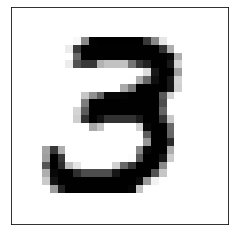

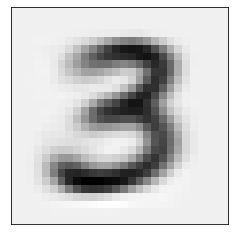

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# show plot first run
%matplotlib inline
#%matplotlib notebook


#%matplotlib notebook
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 


pca = PCA(2)

def calculate_pca(data):
    """
    Berechnet die (zwei) Hauptkomponenten der Eingabedaten und projiziert die daten in den niedrig dimensionalen Raum.

    :param data: n m-dimensional datapoints (ndarray with shape (n,m))
    :return: principal components and projected datapoints
    """
    points = pca.fit_transform(data)
    return pca.components_, points

def project_points_into_low_space(data):
    """
    Projiziert Datenpunkt(e) aus dem Orginal Raum in den niedrigen Datenraum.
    (784 Dimensionen -> 2 Dimensionen)

    :param data: n 784-dimensional datapoints (ndarray with shape (n,784))
    :return: n 2-dimensional datapoints (ndarray with shape (n,2))
    """
    if len(data.shape) < 2:
        return pca.transform(data[None])
    return pca.transform(data)

def project_points_into_orginal_space(data):
    """
    Projiziert Datenpunkt(e) aus dem niedrigen Datenraum in den Orginalen Raum.
    (2 Dimensionen -> 784 Dimensionen)

    :param data: n 2-dimensional datapoints (ndarray with shape (n,2))
    :return: n 784-dimensional datapoints (ndarray with shape (n,784))
    """
    if len(data.shape) < 2:
        return pca.inverse_transform(data)
    return pca.inverse_transform(data)


def plot_image(img):
    """Zeigt ein 28x28 Pixel großes Bild an. Bild kann als Vektor übergeben werden."""
    fig,ax = plt.subplots(1, 1,
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    ax.imshow(img.reshape(28, 28), cmap='binary', interpolation='nearest')


def plot_multiple_image(imgs):
    """Zeigt mehrere 28x28 Pixel große Bilder an. Bilder können als Vektoren übergeben werden."""
    num = len(imgs)
    fig, axes = plt.subplots(int(np.round(np.sqrt(num))), int(np.ceil(np.sqrt(num))),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        if i < num:
            ax.imshow(imgs[i].reshape(28, 28), cmap='binary', interpolation='nearest', clim=(0, 255))
        else:
            ax.set_axis_off()


def plot_interactive(points_2d, images):
    """
    Erschaft ein interaktiven Plot. Wenn auf ein Datenpunkt im niedrig dimensionalen Raum geklickt wird,
    wird der zugehörige ursprüngliche Datenpunkt als Bild angezeigt

    :param points_2d: n 2-dimensional datapoints (ndarray with shape (n,2))
    :param images: n 784-dimensional datapoints (ndarray with shape (n,784))
    """
    def on_pick(event):
        ind = event.ind[0]
        print('picked idx:', ind)
        plot_image(data[ind])
        plt.show()

    fig,ax = plt.subplots(1, 1)
    ax.plot(points_2d[:, 0], points_2d[:, 1], 'o', picker=5)
    plt.connect('pick_event', on_pick)

if __name__ == '__main__':
    # load Data
    data = np.load("data.npy")
    one = plt.imread("one.jpg")
    
    # plot data
    plot_multiple_image(data[:30])
    plt.show()

    # plot one image
    #plot_image(one)
    #plt.show()

    # get principle components
    pcs, points_2d = calculate_pca(data)
    # other method to get project data in lower dimensional space:
    points_2d = project_points_into_low_space(data)

    # TODO: Ihre Erforschung  
    #A 1b)
    lowdim = project_points_into_low_space(data[:30])
    highdim = project_points_into_orginal_space(lowdim)
    plot_multiple_image(highdim)
    plt.show()

    # A 1a)
    # plot one image
    # show '1' image
    plot_image(one)
    plt.show()
    # show '1' reconstructed
    D = one.flatten()
    lowdim = project_points_into_low_space(D)
    highdim = project_points_into_orginal_space(lowdim)
    plot_image(highdim)
    plt.show()
    
    # show '3' image
    plot_image(data[600])
    plt.show()
    # show '3' reconstructed
    lowdim = project_points_into_low_space(data[600])
    highdim = project_points_into_orginal_space(lowdim)
    plot_image(highdim)
    plt.show()
    
    # A 2a)
    # use script 'pca_console'
    #plot_interactive(points_2d[:30], data[:30])
    #plt.show()
    #print('gehts weiter')